In [ ]:
#upload data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
import sklearn

In [ ]:
#read data
terrorism = pd.read_csv(r'/content/drive/MyDrive/data/Noordin-Top-Terrorist-Network-Data.csv')
terrorism.isnull().sum()
terrorism.drop('NAME', axis = 1, inplace = True)
i=78
while(i>58):
  terrorism=terrorism.drop([i], axis = 0)
  i-=1

In [ ]:
scaler = StandardScaler()
terrorism_scaled = scaler.fit_transform(terrorism)

In [ ]:
#create model
input_df = Input( shape = (567, ))
x = Dense(567, activation = 'relu')(input_df)
x = Dense(1000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(200, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(6, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(200, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(1000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(567, kernel_initializer='glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
#autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
#training data
autoencoder.fit(terrorism_scaled, terrorism_scaled, batch_size= 120, epochs = 25, verbose = 1)

Epoch 1/25
1/1 [==============================] - 0s 387ms/step - loss: 0.6543 - accuracy: 0.0000e+00
Epoch 2/25
1/1 [==============================] - 0s 36ms/step - loss: 0.5561 - accuracy: 0.0678
Epoch 3/25
1/1 [==============================] - 0s 25ms/step - loss: 0.5141 - accuracy: 0.1356
Epoch 4/25
1/1 [==============================] - 0s 37ms/step - loss: 0.4709 - accuracy: 0.2373
Epoch 5/25
1/1 [==============================] - 0s 28ms/step - loss: 0.4234 - accuracy: 0.3390
Epoch 6/25
1/1 [==============================] - 0s 26ms/step - loss: 0.3779 - accuracy: 0.4068
Epoch 7/25
1/1 [==============================] - 0s 24ms/step - loss: 0.3358 - accuracy: 0.3898
Epoch 8/25
1/1 [==============================] - 0s 32ms/step - loss: 0.2938 - accuracy: 0.3898
Epoch 9/25
1/1 [==============================] - 0s 26ms/step - loss: 0.2562 - accuracy: 0.4576
Epoch 10/25
1/1 [==============================] - 0s 30ms/step - loss: 0.2236 - accuracy: 0.4746
Epoch 11/25
1/1 [=======

In [ ]:
#predect compression data
pred = encoder.predict(terrorism_scaled)

In [ ]:
#spectral algorithm
spectral = SpectralClustering(n_clusters=3)
spectral.fit_predict(pred)
labels_terrorism = spectral.labels_
print(labels_terrorism)
#metrics
silhouette_avg = silhouette_score(pred, labels_terrorism)
Davies_community= sklearn.metrics.davies_bouldin_score(pred, labels_terrorism)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred, labels_terrorism)  

print(Calinski_Harabaz)
print(Davies_community)
print(silhouette_avg)

[0 0 0 1 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
18.208013999213463
0.7289082813506705
0.42021865


In [ ]:
#use this code when you need to save the list of label 
fichier = open("l59features_spectralAE.txt", "w")
st=""
for i in labels_finale:
  st=str(i)
  fichier.write(st+" ")
fichier.write(st+"\n")    
fichier.close()

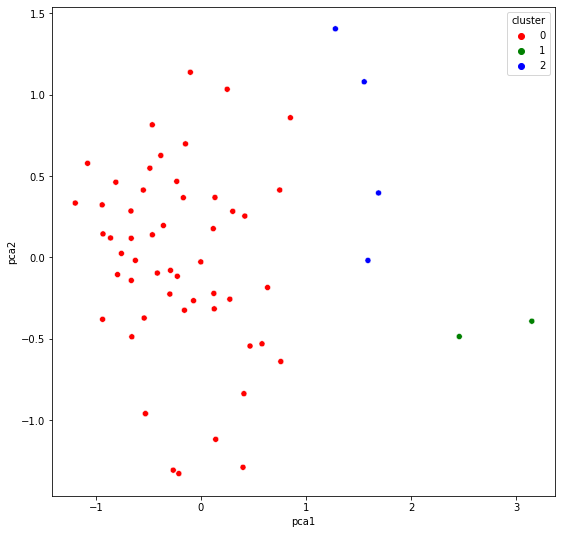

In [ ]:
#show the data
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels_terrorism})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df, palette = ['red','green','blue'])